In [9]:
# Needed imports
from MarkinchiParser import MarkinchiParser as MIParser
from MarkinchiGenerator import MarkinchiGenerator as MIGenerator
import MarkinchiUtils as MIUtils
from MolEnumerator import MolEnumerator
from rdkit import Chem
from rdkit.Chem import Draw
import os

In [10]:
# Generate a MarkInChI from a V3000 .mol file
filename = "molfiles\\test82.mol"
filedir = os.path.join(os.getcwd(), filename)

generator = MIGenerator()
generator.get_from_molfile(filedir)
markinchi = generator.generate_markinchi()
print(markinchi)

MarkInChI=1B/C6H5Zz/c7-6-4-2-1-3-5-6/h1-5H<M>NOSZz3/c2-3(5,6)1-4<M>t3-/m0/s1</M><M></M><M>BrZz/c1-2!ClZz/c1-2</M><M>FZz/c1-2</M></M>


In [11]:
# Generate a list of Mols from a MarkInChI
parser = MIParser(markinchi)
mol, rgroups = parser.parse_markinchi()

enumerator = MolEnumerator(mol, rgroups)
mol_list = enumerator.get_mol_list()
inchi_list = enumerator.get_inchi_list(tidy=False)

[11:31:05] WARNING: Accepted unusual valence(s): Xe(2)



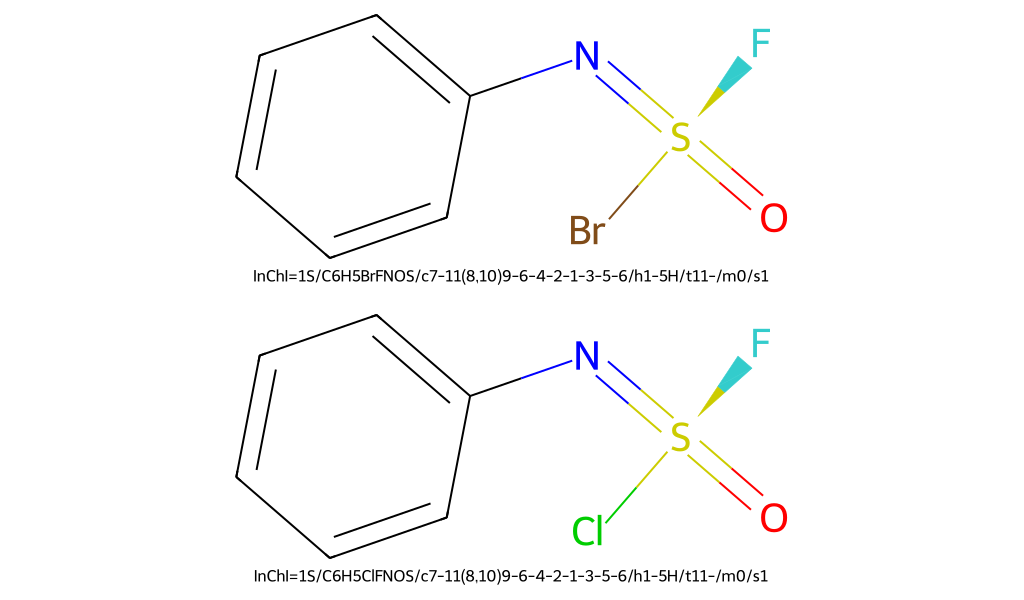

In [12]:
# Show each Mol in the list of Mols along with its InChI
# NB you may need to fiddle around with the parameters to get something legible, depending on how many Mols there are / how long the InChIs are
# If you get a 'File parsing error: PNG header not recognized', this seems to be due to the image being too big - try reducing the height of
# each image using subImgSize, or truncating the list by specifying maxMols


for mol in mol_list:
    Chem.rdDepictor.Compute2DCoords(mol)

Draw.MolsToGridImage(mol_list, molsPerRow=1, maxMols=100, legends=inchi_list, subImgSize=(1024, 300))

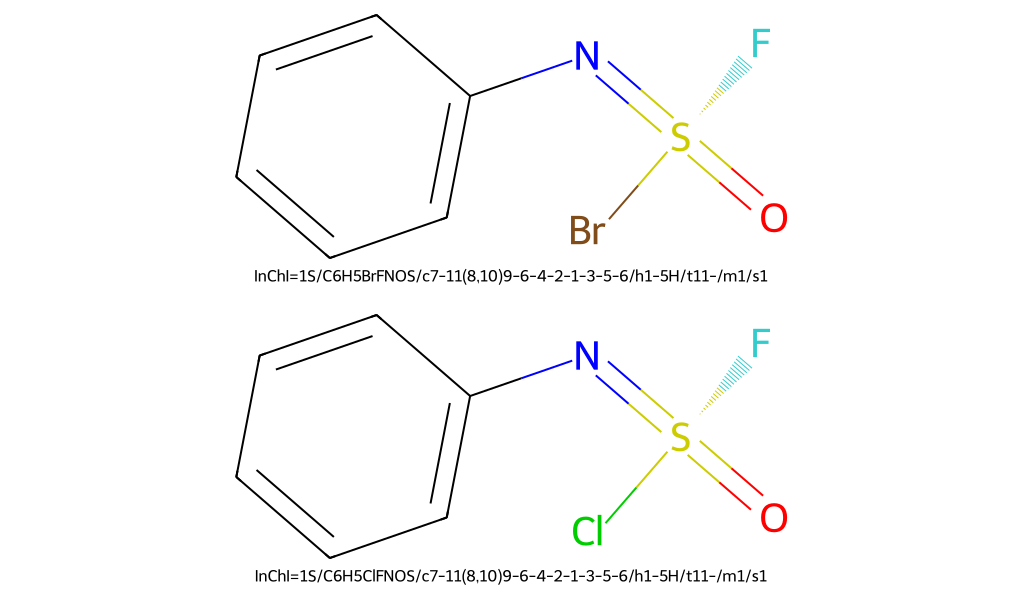

In [13]:
ref_mol, ref_rgroups = MIUtils.parse_molfile(filedir)
ref_enumerator = MolEnumerator(ref_mol, ref_rgroups)
ref_mol_list = ref_enumerator.get_mol_list()
ref_inchi_list = ref_enumerator.get_inchi_list(tidy=False)

for mol in ref_mol_list:
    Chem.rdDepictor.Compute2DCoords(mol)
    mol = Draw.rdMolDraw2D.PrepareMolForDrawing(mol)
    

Draw.MolsToGridImage(ref_mol_list, molsPerRow=1, maxMols=100, legends=ref_inchi_list, subImgSize=(1024, 300))